In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import string as s
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
train_data.shape

(120000, 3)

In [5]:
test_data.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [6]:
test_data.shape

(7600, 3)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.3+ KB


In [9]:
train_data.isnull().sum()

,0
Class Index,0
Title,0
Description,0


In [10]:
test_data.isnull().sum()

,0
Class Index,0
Title,0
Description,0


In [11]:
train_data.duplicated().sum()

np.int64(0)

In [12]:
test_data.duplicated().sum()

np.int64(0)

In [13]:
train_x=train_data.Description[:60000]
test_x=test_data.Description
train_y=train_data["Class Index"][:60000]
test_y=test_data["Class Index"]

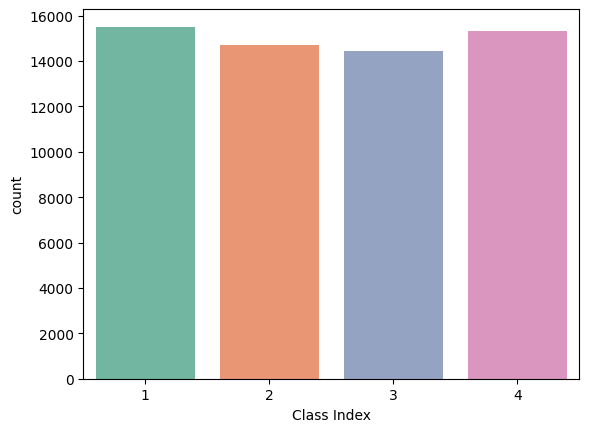

In [14]:
df=train_data[:60000]
sns.countplot(x='Class Index', data=df, palette='Set2');

In [15]:
fst = df.Description[df["Class Index"][df["Class Index"]==1].index]

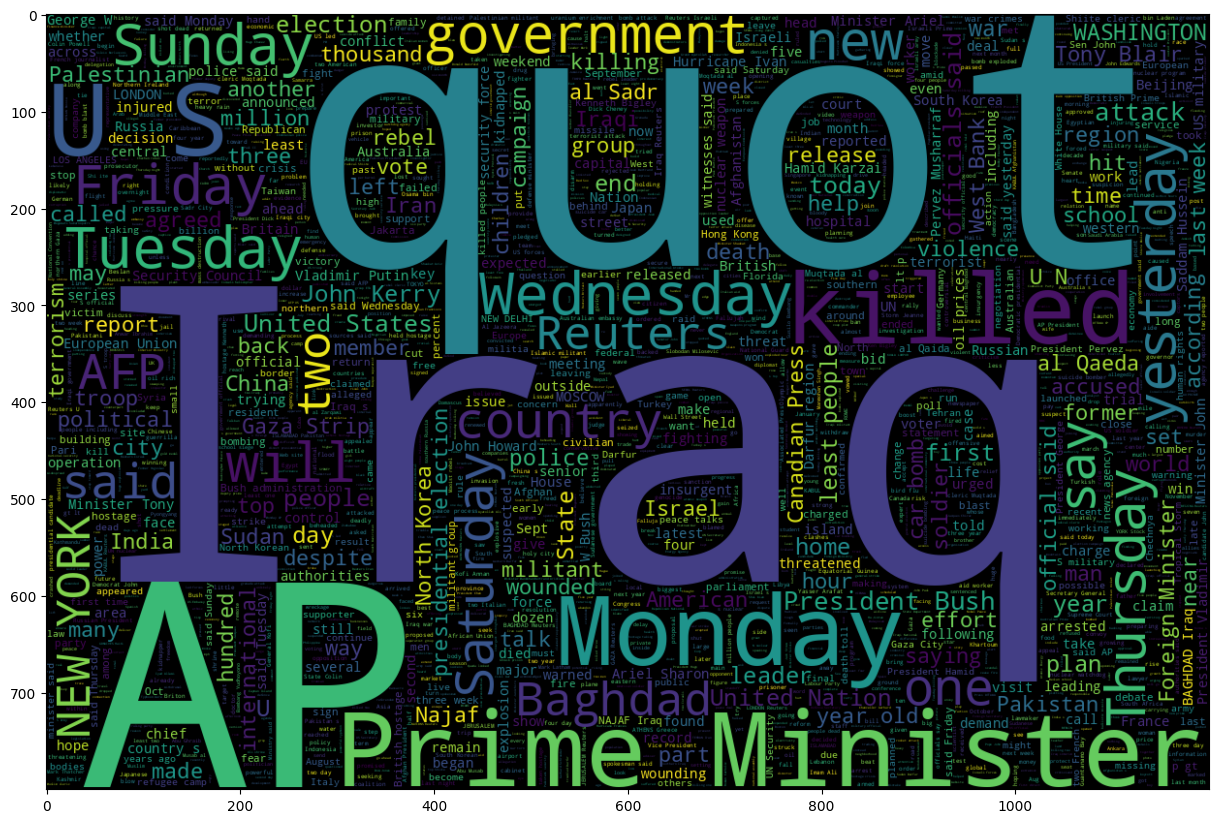

In [16]:
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(fst))
plt.imshow(wordcloud,interpolation = 'bilinear');

In [17]:
sec = df.Description[df["Class Index"][df["Class Index"]==2].index]

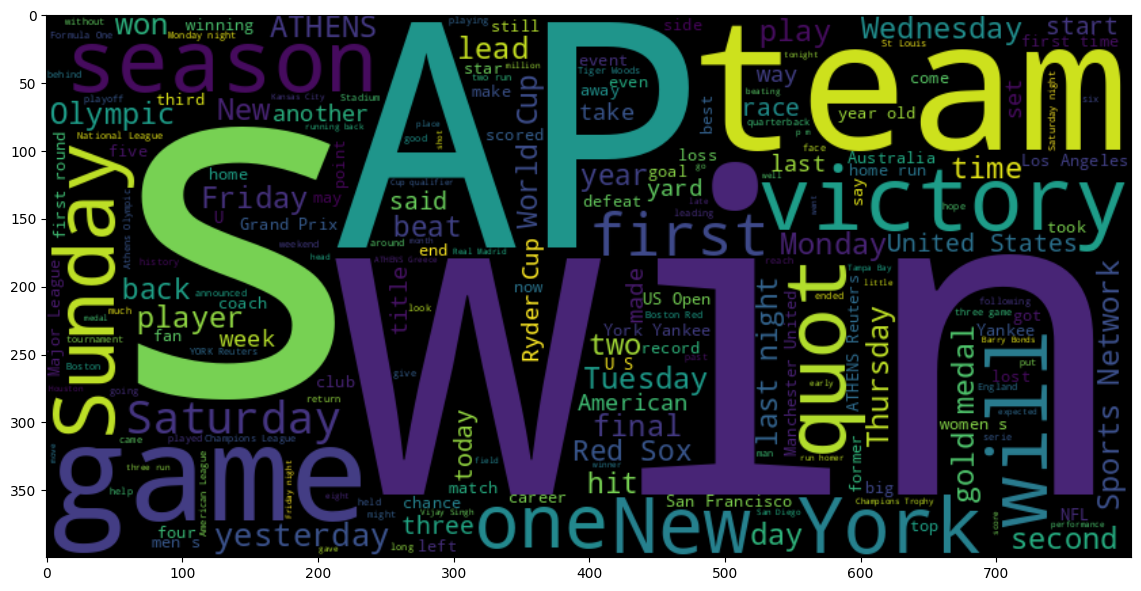

In [18]:
plt.figure(figsize=(14,8))
plt.imshow(WordCloud(width=800, height=400).generate(" ".join(sec)),interpolation='bilinear')

In [19]:
trd = df.Description[df["Class Index"][df["Class Index"]==3].index]

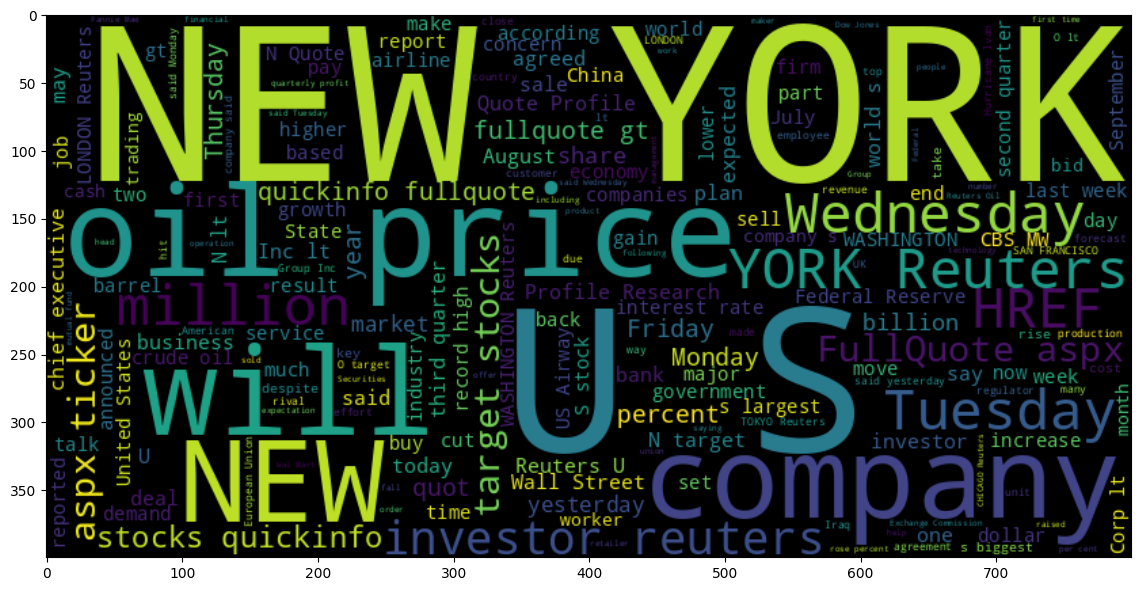

In [20]:
plt.figure(figsize=(14,8))
plt.imshow(WordCloud(width=800, height=400).generate(" ".join(trd)),interpolation='bilinear')

In [21]:
frt = df.Description[df["Class Index"][df["Class Index"]==4].index]

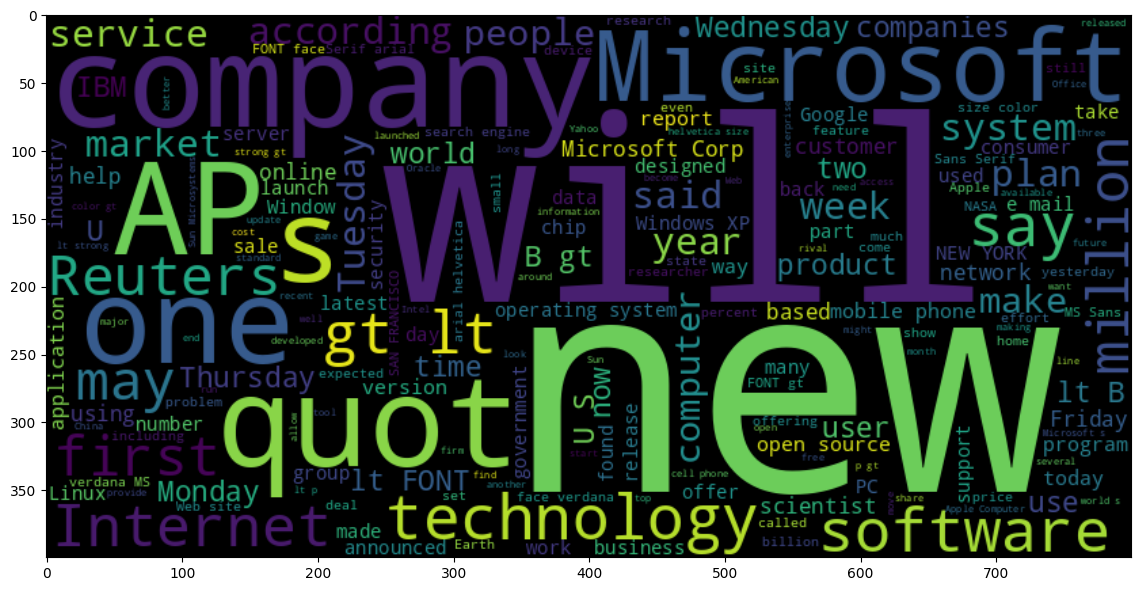

In [22]:
plt.figure(figsize=(14,8))
plt.imshow(WordCloud(width=800, height=400).generate(" ".join(frt)),interpolation='bilinear')

In [23]:
def tokenization(text):
    lst=text.split()
    return lst
train_x=train_x.apply(tokenization)
test_x=test_x.apply(tokenization)

In [24]:
def lowercasing(lst):
    new_lst=[]
    for  i in  lst:
        i=i.lower()
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing)

In [25]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_punctuations)
test_x=test_x.apply(remove_punctuations)

In [26]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

In [27]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords)

In [28]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [29]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [30]:
tfidf=TfidfVectorizer(max_features=10000,min_df=6)
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)
print("No. of features extracted")
print(len(tfidf.get_feature_names_out()))
print(tfidf.get_feature_names_out()[:20])

train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
10000
['aa' 'aapl' 'aaron' 'ab' 'ababa' 'abandon' 'abandoned' 'abandoning'
 'abarrel' 'abbey' 'abc' 'abducted' 'abduction' 'abductor' 'abdul'
 'abdullah' 'ability' 'able' 'aboard' 'abortion']


In [31]:
NB_MN=MultinomialNB()
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


In [32]:
def eval_model(y,y_pred):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

In [33]:
def confusion_mat(color):
    cof=confusion_matrix(test_y, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['fst','sec','trd','frt'],yticklabels=['fst','sec','trd','frt']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

In [34]:
eval_model(test_y,pred)

a=round(accuracy_score(test_y,pred)*100,3)


F1 score of the model
0.8817105263157895
Accuracy of the model
0.8817105263157895
Accuracy of the model in percentage
88.171 %


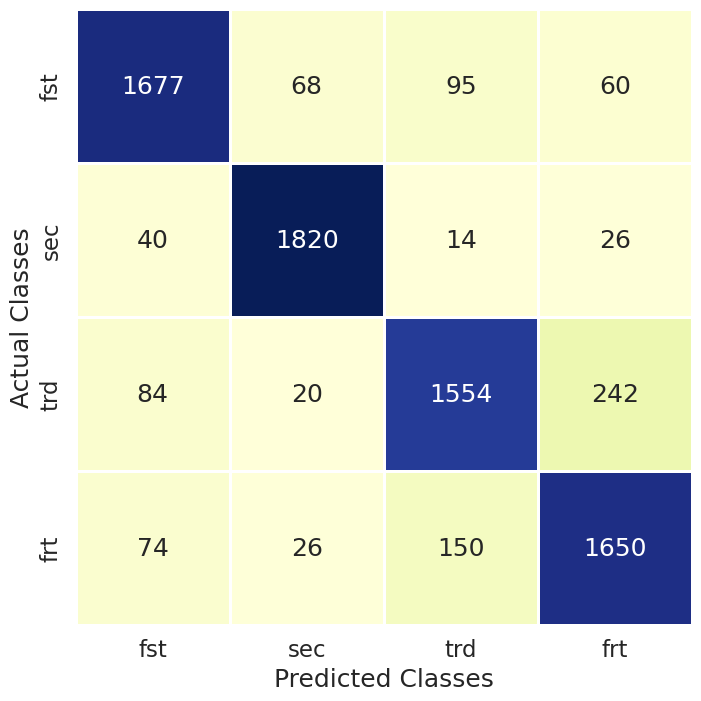

In [35]:
confusion_mat('YlGnBu')

In [36]:
DT=DecisionTreeClassifier()
DT.fit(train_arr,train_y)
pred=DT.predict(test_arr)

print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 2, 2, 3, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


In [37]:
eval_model(test_y,pred)

b=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.7675
Accuracy of the model
0.7675
Accuracy of the model in percentage
76.75 %


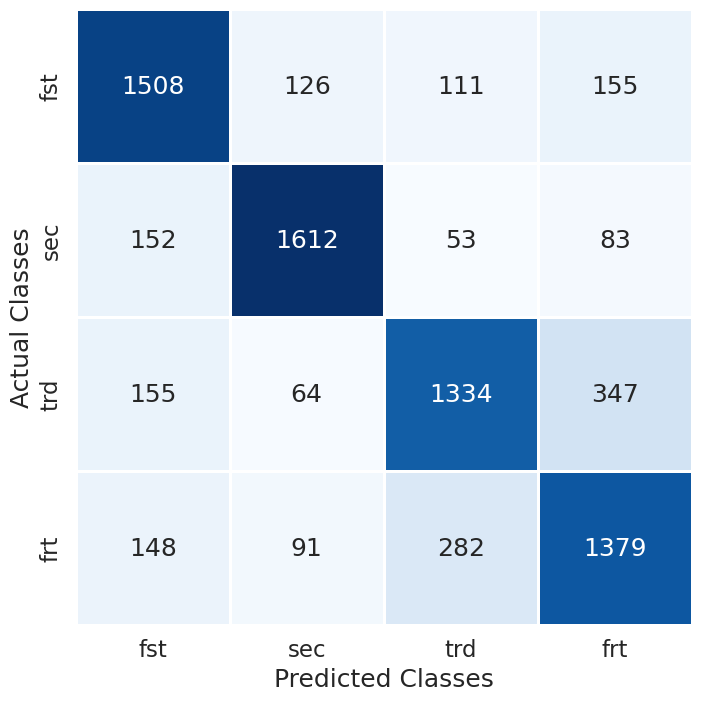

In [38]:
confusion_mat('Blues')

In [39]:
NB=GaussianNB()
NB.fit(train_arr,train_y)
pred=NB.predict(test_arr)

In [40]:
eval_model(test_y,pred)

c=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.7982894736842105
Accuracy of the model
0.7982894736842105
Accuracy of the model in percentage
79.829 %


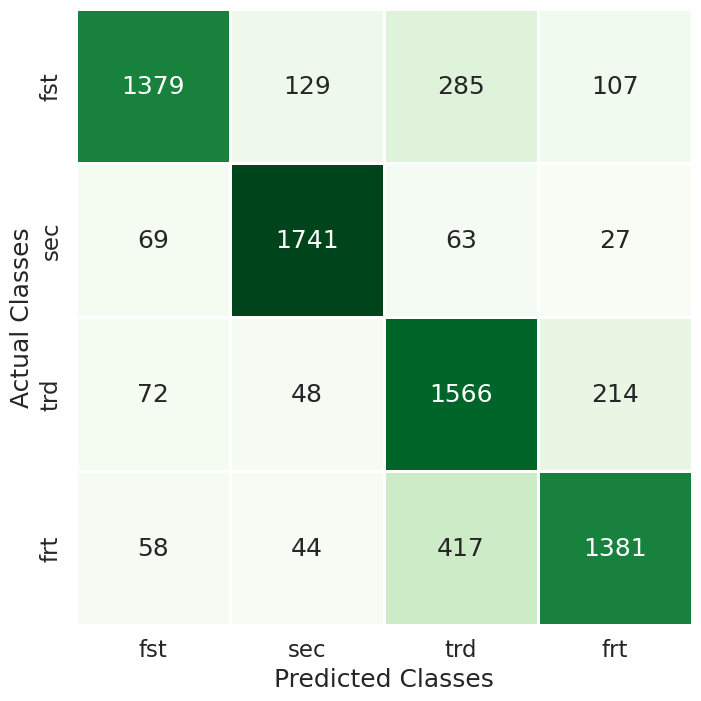

In [41]:
confusion_mat('Greens')

In [42]:
SGD=SGDClassifier()
SGD.fit(train_arr,train_y)
pred=SGD.predict(test_arr)

In [43]:
eval_model(test_y,pred)

d=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8892105263157895
Accuracy of the model
0.8892105263157895
Accuracy of the model in percentage
88.921 %


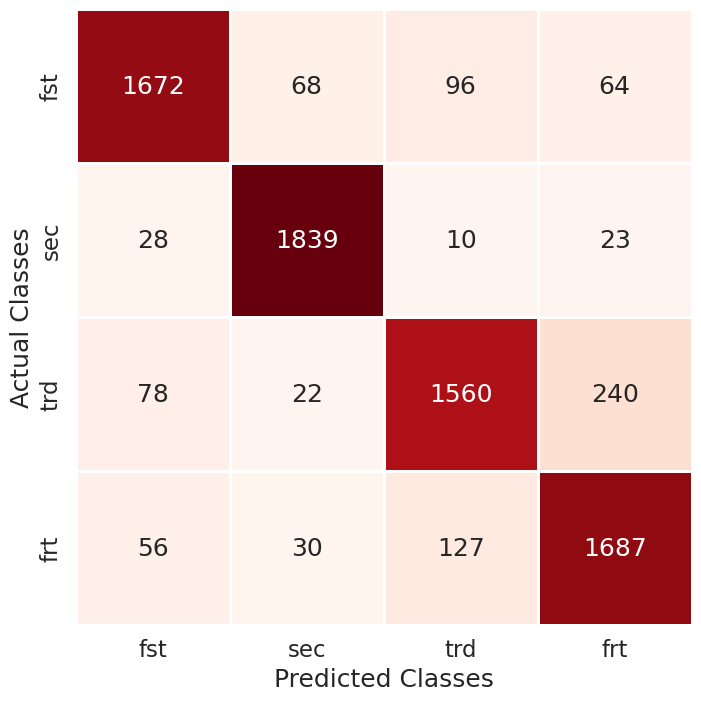

In [44]:
confusion_mat('Reds')

In [45]:
lgbm=LGBMClassifier()
lgbm.fit(train_arr,train_y)
pred=lgbm.predict(test_arr)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 5.917107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 280877
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 6636
[LightGBM] [Info] Start training from score -1.352666
[LightGBM] [Info] Start training from score -1.406429
[LightGBM] [Info] Start training from score -1.424342
[LightGBM] [Info] Start training from score -1.363490


In [46]:
eval_model(test_y,pred)

e=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8728947368421053
Accuracy of the model
0.8728947368421053
Accuracy of the model in percentage
87.289 %


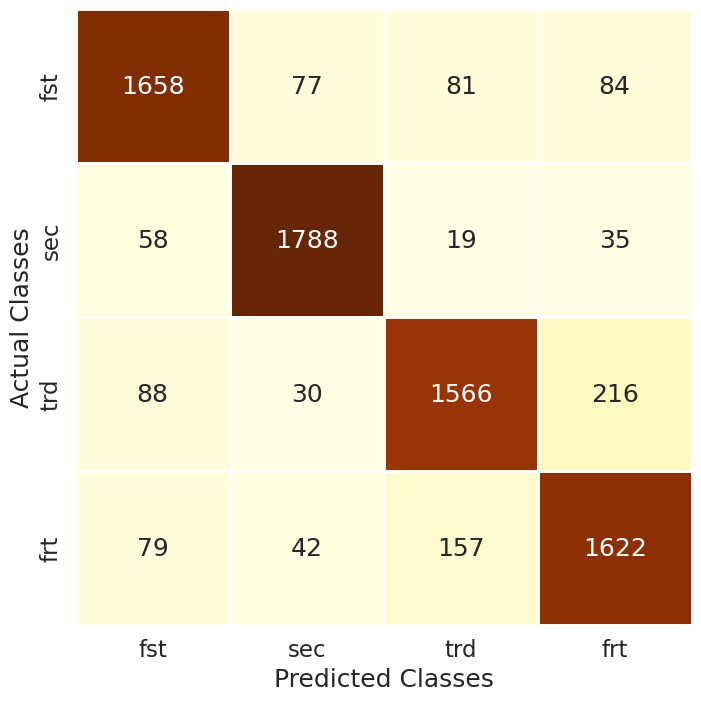

In [47]:
confusion_mat('YlOrBr')

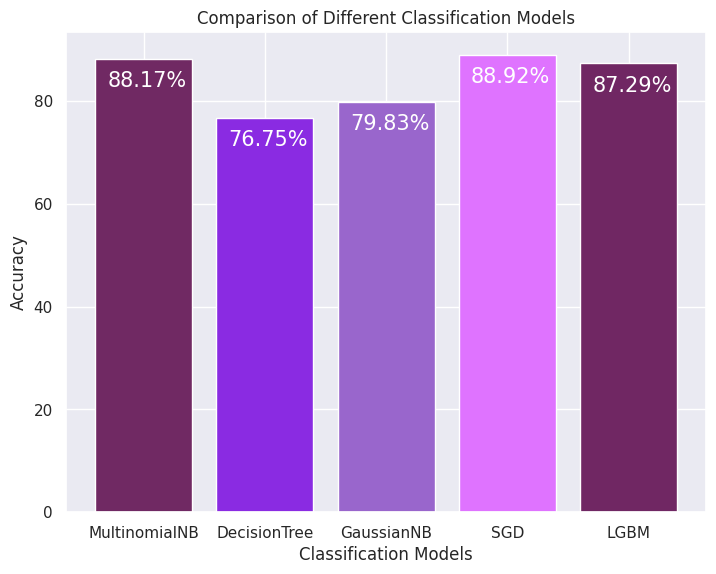

In [48]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['MultinomialNB', 'DecisionTree', 'GaussianNB', 'SGD','LGBM']
Accuracy=[a,b,c,d,e]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc','#df73ff','#702763']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();